# Diffusion with Adsorption in Polymers
Edited by: Sam Zhang, szhang32@nd.edu

## References

* Paul, D. R. (1969). Effect of immobilizing adsorption on the diffusion time lag. Journal of Polymer Science Part A‐2: Polymer Physics, 7(10), 1811-1818. [[pdf](https://onlinelibrary.wiley.com/doi/pdf/10.1002/pol.1969.160071015?)]

* Vieth, W. R., & Sladek, K. J. (1965). A model for diffusion in a glassy polymer. Journal of Colloid Science, 20(9), 1014-1033. [[doi](https://doi.org/10.1016/0095-8522(65)90071-1)]

##Learning Goals

*	Understanding Diffusion and Adsorption Processes: Gain an in-depth understanding of the physical and chemical principles underlying the diffusion of molecules and their adsorption onto substrates.

*	Mathematical Representation of Diffusion: Develop the ability to represent diffusion processes mathematically using differential equations.

*	Visualization: Creating plots to visualize dimensional  non-dimensionalization diffusion models



## Model

Here we consider the diffusion of a small molecule into an immobile substrate with adsorption. Following the cited references:

$$
\begin{align*}
\frac{\partial (c + c_a)}{\partial t} & = D \frac{\partial^2 c}{\partial x^2} \\
\end{align*}
$$

Langmuir isotherm:

$$
\begin{align*}
c_a & = \frac{q K c}{1 + K c}
\end{align*}
$$

Applying the chain rule

$$
\begin{align*}
\frac{\partial c_a}{\partial t} & = \frac{\partial c_a}{\partial c} \cdot \frac{\partial c}{\partial t} \\
\end{align*}
$$

We first need to calculate $\frac{\partial c_a}{\partial c}$ from the Langmuir isotherm equation. After that, we can substitute $\frac{\partial c_a}{\partial c}$ into the diffusion equation

Let's start with the derivation of $\frac{\partial c_a}{\partial c}$. The derivative of $c_a$ with respect to $c$ from the Langmuir isotherm is:

$$
\begin{align*}
\frac{\partial c_a}{\partial c} = \frac{K q}{1 + K c} - \frac{K^2 cq}{(1 + Kc)^2}
\end{align*}
$$

Now, substituting this into the chain rule expression $\begin{align*}
\frac{\partial c_a}{\partial t} & = \frac{\partial c_a}{\partial c} \cdot \frac{\partial c}{\partial t} \\\end{align*}$,we get:

$$
\begin{align*}
\frac{\partial c_a}{\partial t}  = \left( \frac{K q}{1 + K c} - \frac{K^2 {cq}}{(1 + (K c)^2} \right) \frac{\partial c}{\partial t}
\end{align*}
$$

The total time derivative of the concentration including adsorption is then:
$$
\begin{align*}
\frac{\partial (c + c_a)}{\partial t} = \frac{\partial c}{\partial t} + \frac{\partial c_a}{\partial t} = \frac{\partial c}{\partial t} + \left( \frac{Kq}{1 + Kc} - \frac{K^2cq}{(1 + Kc)^2} \right) \frac{\partial c}{\partial t}
\end{align*}
$$

This simplifies to:
$$
\begin{align*}
\frac{\partial (c + c_a)}{\partial t} = \left( 1 + \frac{Kq}{1 + Kc} - \frac{K^2cq}{(1 + Kc)^2} \right) \frac{\partial c}{\partial t}
\end{align*}
$$

After application of the chain rule:

$$
\begin{align*}
\left[1 + \frac{q K}{(1 + K c)^2}\right]\frac{\partial c}{\partial t} & = D \frac{\partial^2 c}{\partial x^2} \\
\end{align*}
$$

Now, Let's represent the arbitrary isotherm by $c = f(c_a)$:

Since $c = f(c_a)$, the derivative $\frac{\partial c_a}{\partial t}$ is essentially the reciprocal of the derivative of the isotherm function $f$ with respect to $c_a$:

$$
\begin{align*}
\frac{\partial c_a}{\partial c} = \frac{1}{\frac{\partial f}{\partial c_a}}
\end{align*}
$$

The diffusion equation can be rewritten by substituting the expression for $\frac{\partial c}{\partial t}$:

$$
\begin{align*}
\left(1 + \frac{1}{\frac{\partial f}{\partial c_a}}\right)\frac{\partial c}{\partial t} & = D \frac{\partial^2 c}{\partial x^2} \\
\end{align*}
$$

This equation will vary depending on the specific form of $f(c_a)$, which represents the relationship between the concentration in the fluid and the adsorbed concentration for a particular system. The specific form of $f$  and its derivative will dictate how the diffusion and adsorption interact in the system.


Initial conditions for $c(t, x)$:

$$
\begin{align*}
c(0, x) & = 0 & 0 < x \leq L \\
\end{align*}
$$

Boundary conditions for $c(t, x)$:

$$
\begin{align*}
c(t, 0) & = C_0 & t \geq 0 \\
c_x(t, L) & = 0 & t \geq 0 \\
\end{align*}
$$

**Exercise 1**: Verify the use of the chain rule. Generalize to an arbitrary isotherm $c = f(c_a)$.

**Exercise 2**: Compare the dimensional and dimensionless implementations by finding values for dimensionless value of $\alpha$ and surface concentration that reproduce the simulation results observed in dimensional model.

**Exercise 3**: Implement a Pyomo model as a DAE without using the chain rule.

**Exercise 4**: Replace the finite difference transformation on $x$ with collocation. What (if any) practical advantages are associated with collocation?

_Ease of Implementing Boundary Conditions:_ Implementing complex boundary conditions can be more straightforward with collocation methods, as the approximate solution can be directly evaluated at the boundary points.

_Fewer Elements Required:_ For a given level of accuracy, collocation methods can often achieve this with fewer elements than finite difference methods. This is because each element captures more of the solution's behavior through the polynomial approximation.

**Exercise 5**: Revise the problem and model with a linear isotherm $c_a = K c$, and use the solution concentration $C_s$ to scale $c(t, x)$. How many independent physical parameters exist for this problem? Find the analytical solution, and compare to a numerical solution found using Pyomo.DAE.

Using the linear isotherm equation, we can substitute  $c_a = K c$ into the diffusion equation $
\begin{align*}
\frac{\partial (c + c_a)}{\partial t} & = D \frac{\partial^2 c}{\partial x^2} \\
\end{align*}$:

$$
\begin{align*}
\frac{\partial (c(1+K))}{\partial t} & = D \frac{\partial^2 c}{\partial x^2} \\
\end{align*}
$$

Now, applying the chain rule to the left side of the equation, we have:

$$
\begin{align*}
\left[1 + K c\right]\frac{\partial c}{\partial t} & = D \frac{\partial^2 c}{\partial x^2} \\
\end{align*}
$$

There are two independent physical parameters exist, which are $K$ and $D$. Scaled with ${c' = C_s c}$,we have:

$$
\begin{align*}
\left[1 + K C_s c'\right]\frac{\partial c'}{\partial t} & = D C_s \frac{\partial^2 c'}{\partial x^2} \\
\end{align*}
$$

**Exercise 6**: Revise the dimensionless model for the Langmuir isotherm to use the solution concentraion $C_s$ to scale $c(x, t)$. How do the models compare? How many independent parameters exist for this problem? What physical or chemical interpretations can you assign to the dimensionless parameters appearing in the models?

**Exercise 7**: The Langmuir isotherm is an equilibrium relationship between absorption and desorption processes. The Langmuir isotherm assumes these processes are much faster than diffusion. Formulate the model for the case where absorption and desorption kinetics are on a time scale similar to the diffusion process.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import os
import sys
import shutil
import subprocess

if "google.colab" in sys.modules:
    !wget "https://raw.githubusercontent.com/IDAES/idaes-pse/main/scripts/colab_helper.py"
    import colab_helper
    colab_helper.install_idaes()
    colab_helper.install_ipopt()

import pyomo.environ as pyo

--2023-12-15 19:20:45--  https://raw.githubusercontent.com/IDAES/idaes-pse/main/scripts/colab_helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5459 (5.3K) [text/plain]
Saving to: ‘colab_helper.py’

colab_helper.py     100%[===================>]   5.33K  --.-KB/s    in 0s      

2023-12-15 19:20:46 (41.2 MB/s) - ‘colab_helper.py’ saved [5459/5459]

Installing idaes via pip...
idaes was successfully installed
idaes, version 2.3.0


Running idaes get-extensions to install Ipopt, k_aug, and more...
Checking solver versions:
Ipopt 3.13.2 (x86_64-pc-linux-gnu), ASL(20190605)



[K_AUG] 0.1.0, Part of the IDAES PSE framework
Please visit https://idaes.org/ (x86_64-pc-linux-gnu), ASL(20190605)



Couenne 0.5.8 -- an Open-Source solver for Mixed Integer Nonl

## Pyomo model

In [2]:
import pyomo.environ as pyo
import pyomo.dae as dae

# parameters
tf = 80
D = 2.68
L = 1.0
KL = 20000.0
Cs = 0.0025  #adsorption saturation constant
qm = 1.0

m = pyo.ConcreteModel()

m.t = dae.ContinuousSet(bounds=(0, tf))
m.x = dae.ContinuousSet(bounds=(0, L))

m.c = pyo.Var(m.t, m.x)
m.dcdt = dae.DerivativeVar(m.c, wrt=m.t)
m.dcdx = dae.DerivativeVar(m.c, wrt=m.x)
m.d2cdx2 = dae.DerivativeVar(m.c, wrt=(m.x, m.x))

@m.Constraint(m.t, m.x)
def pde(m, t, x):
    return m.dcdt[t, x] * (1 + qm*KL/(1 + KL*m.c[t, x])** 2) == D * m.d2cdx2[t, x]

@m.Constraint(m.t)
def bc1(m, t):
    return m.c[t, 0] == Cs

@m.Constraint(m.t)
def bc2(m, t):
    return m.dcdx[t, L] == 0

@m.Constraint(m.x)
def ic(m, x):
    if x == 0:
        return pyo.Constraint.Skip
    return m.c[0, x] == 0.0

# transform and solve
pyo.TransformationFactory('dae.finite_difference').apply_to(m, wrt=m.x, nfe=40)
pyo.TransformationFactory('dae.finite_difference').apply_to(m, wrt=m.t, nfe=40)
pyo.SolverFactory('ipopt').solve(m).write()

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 6682
  Number of variables: 6683
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.13.2\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 2.2249505519866943
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


## Visualization

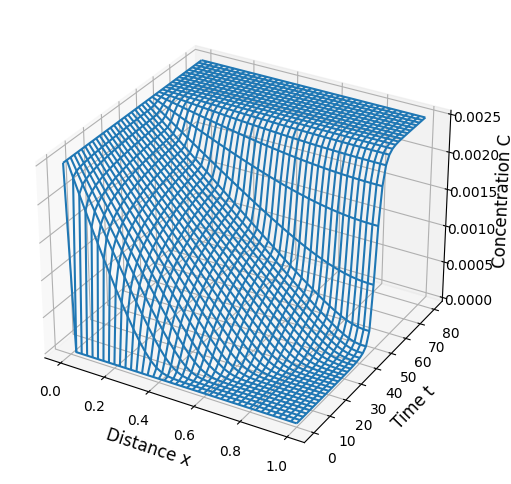

In [3]:
def model_plot(m):
    t = sorted(m.t)
    x = sorted(m.x)

    xgrid = np.zeros((len(t), len(x)))
    tgrid = np.zeros((len(t), len(x)))
    cgrid = np.zeros((len(t), len(x)))

    for i in range(0, len(t)):
        for j in range(0, len(x)):
            xgrid[i,j] = x[j]
            tgrid[i,j] = t[i]
            cgrid[i,j] = m.c[t[i], x[j]].value

    fig = plt.figure(figsize=(10,6))
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    #ax.view_init(30, 225)
    ax.set_xlabel('Distance x',fontsize=12)
    ax.set_ylabel('Time t',fontsize=12)
    ax.set_zlabel('Concentration C',fontsize=12)
    p = ax.plot_wireframe(xgrid, tgrid, cgrid)

# visualization
model_plot(m)

## Dimensional analysis

$$
\begin{align*}
x & = L x' \\
c & = C c' \\
t & = T t' \\
\end{align*}
$$

$$
\begin{align*}
\left[1 + \frac{q K}{(1 + K C c')^2}\right]\frac{\partial c'}{\partial t'} & = \frac{TD}{L^2} \frac{\partial^2 c'}{\partial x'^2} \\
\end{align*}
$$

Assuming $L$ is determined by the experimental apparatus, choose

$$
\begin{align*}
T & = \frac{L^2}{D} \\
C & = \frac{1}{K} \\
\end{align*}
$$

which results in a one parameter model

$$
\begin{align*}
\left[1 + \frac{\alpha}{(1 + c')^2}\right]\frac{\partial c'}{\partial t'} & =  \frac{\partial^2 c'}{\partial x'^2} \\
\end{align*}
$$

where $\alpha = q K$ represents a dimensionless capacity of the substrate to absorb the diffusing molecule.

In the dimension case, $KL$ = 20000, $qm$ = 1.0, so $\alpha = q K = 20000$

## Dimensionless Pyomo model

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 20501
  Number of variables: 20503
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.13.2\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 39.70981168746948
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


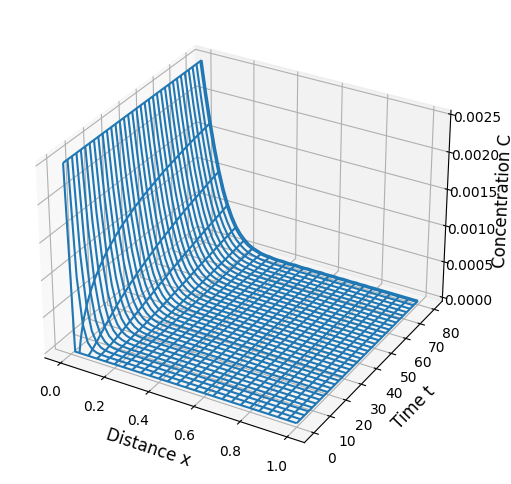

In [7]:
import pyomo.environ as pyo
import pyomo.dae as dae

# parameters
tf = 80
Cs = 0.0025
alpha = 20000.0

m = pyo.ConcreteModel()

m.t = dae.ContinuousSet(bounds=(0, tf))
m.x = dae.ContinuousSet(bounds=(0, 1))

m.c = pyo.Var(m.t, m.x)
m.s = pyo.Var(m.t, m.x)

m.dcdt = dae.DerivativeVar(m.c, wrt=m.t)
m.dcdx = dae.DerivativeVar(m.c, wrt=m.x)
m.d2cdx2 = dae.DerivativeVar(m.c, wrt=(m.x, m.x))

@m.Constraint(m.t, m.x)
def pde(m, t, x):
    return m.dcdt[t, x] * (1 + alpha/(1 + m.c[t, x])** 2) == m.d2cdx2[t, x]

@m.Constraint(m.t)
def bc1(m, t):
    return m.c[t, 0] == Cs

@m.Constraint(m.t)
def bc2(m, t):
    return m.dcdx[t, 1] == 0

@m.Constraint(m.x)
def ic(m, x):
    if (x == 0) or (x == 1):
        return pyo.Constraint.Skip
    return m.c[0, x] == 0.0

# transform and solve
pyo.TransformationFactory('dae.finite_difference').apply_to(m, wrt=m.x, nfe=50)
pyo.TransformationFactory('dae.finite_difference').apply_to(m, wrt=m.t, nfe=100)
pyo.SolverFactory('ipopt').solve(m).write()

model_plot(m)

## Sensitive Analysis

In [9]:
#Sensitive Analysis

# The function for the model
def sensitive_analysis_model(tf, D, L, KL, Cs, qm):
    m = pyo.ConcreteModel()

    m.t = dae.ContinuousSet(bounds=(0, tf))
    m.x = dae.ContinuousSet(bounds=(0, L))

    m.c = pyo.Var(m.t, m.x)
    m.dcdt = dae.DerivativeVar(m.c, wrt=m.t)
    m.dcdx = dae.DerivativeVar(m.c, wrt=m.x)
    m.d2cdx2 = dae.DerivativeVar(m.c, wrt=(m.x, m.x))

    @m.Constraint(m.t, m.x)
    def pde(m, t, x):
        return m.dcdt[t, x] * (1 + qm * KL / (1 + KL * m.c[t, x]) ** 2) == D * m.d2cdx2[t, x]

    @m.Constraint(m.t)
    def bc1(m, t):
        return m.c[t, 0] == Cs

    @m.Constraint(m.t)
    def bc2(m, t):
        return m.dcdx[t, L] == 0

    @m.Constraint(m.x)
    def ic(m, x):
        if x == 0:
            return pyo.Constraint.Skip
        return m.c[0, x] == 0.0

    return m

# Sensitivity analysis function
def sensitive_analysis():
    # Varying parameters
    parameters = {
        "tf": [60,80],
        "D": [2.68,2.78],
        "L": [0.8, 1.0],
        "KL": [15000.0, 16000.0],
        "Cs": [0.002, 0.0025],
        "qm": [0.9, 1.0]
    }

    for tf in parameters["tf"]:
        for D in parameters["D"]:
            for L in parameters["L"]:
                for KL in parameters["KL"]:
                    for Cs in parameters["Cs"]:
                        for qm in parameters["qm"]:
                            m = sensitive_analysis_model(tf, D, L, KL, Cs, qm)

                            # transform and solve
                            pyo.TransformationFactory('dae.finite_difference').apply_to(m, wrt=m.x, nfe=20)
                            pyo.TransformationFactory('dae.finite_difference').apply_to(m, wrt=m.t, nfe=20)
                            pyo.SolverFactory('ipopt').solve(m).write()



# Call the sensitive analysis function
sensitive_analysis()


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 1742
  Number of variables: 1743
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.13.2\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.19833993911743164
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0
# 

  - termination condition: infeasible
  - message from solver: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 1742
  Number of variables: 1743
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 6.975189924240112
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number 

  - termination condition: infeasible
  - message from solver: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 1742
  Number of variables: 1743
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.693047285079956
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number 

  - termination condition: infeasible
  - message from solver: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 1742
  Number of variables: 1743
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 4.069305658340454
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number 

  - termination condition: infeasible
  - message from solver: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 1742
  Number of variables: 1743
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.8670299053192139
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number

  - termination condition: infeasible
  - message from solver: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 1742
  Number of variables: 1743
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 8.947237491607666
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number 

  - termination condition: infeasible
  - message from solver: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 1742
  Number of variables: 1743
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 1.4481534957885742
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number

  - termination condition: infeasible
  - message from solver: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 1742
  Number of variables: 1743
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 2.038111448287964
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number 

  - termination condition: infeasible
  - message from solver: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 1742
  Number of variables: 1743
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 10.063022375106812
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number

  - termination condition: infeasible
  - message from solver: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 1742
  Number of variables: 1743
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 3.98264741897583
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number o

  - termination condition: infeasible
  - message from solver: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 1742
  Number of variables: 1743
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 17.304986000061035
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number

  - termination condition: infeasible
  - message from solver: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 1742
  Number of variables: 1743
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 5.960700750350952
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number 

  - termination condition: infeasible
  - message from solver: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 1742
  Number of variables: 1743
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.5338578224182129
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number

## Discussion Question

**1. Discussion**:

How can the findings and outcomes from the sensitivity analysis program contribute to the further development or refinement of the diffusion estimation technique proposed in the article?


**Answer**:Sensitivity analysis helps identify which parameters most significantly affect the outcome of the diffusion estimation. Understanding the influence of these parameters allows for targeted improvements in the model, focusing on the aspects that most strongly dictate the system's behavior.

**2. Discussion**:
How does the adsorption saturation constant (Cs) affect the diffusion process, and what implications does this have for interpreting the model results?

**Answer**: It represents a critical parameter in the adsorption isotherm, which in turn influences how the small molecule interacts with the immobile substrate. The rate of diffusion can be affected by the amount of adsorption. If a significant amount of the molecule is adsorbed (high
$C_s$, the effective concentration of the molecule in the substrate might be lower, potentially slowing down the diffusion process. This is because adsorbed molecules are essentially removed from the pool of freely diffusing molecules.

**3. Discussion**:
How does the diffusion coefficient (D) affect the outcome of the diffusion model, and what considerations should be taken into account when selecting its value for the model?"

**Answer**:The diffusion coefficient directly determines the rate at which molecules spread through the substrate. A higher value of $D$ indicates faster diffusion, leading to quicker spreading of the molecule across the substrate. Conversely, a lower $D$ value results in slower diffusion.

When selecting the diffusion coefficient ($D$) for the model, consider the following:

**Substance and Medium Properties:** $D$ depends on the physical and chemical characteristics of the diffusing molecule and the substrate, such as molecular size, substrate porosity, and temperature.

**Empirical Data:** Ideally, choose $D$ based on empirical data from experiments or literature for comparable systems.

**Model Calibration:** If empirical data are not precise, calibrate $D$ against real-world or experimental data to ensure the model accurately represents observed diffusion behaviors.